#  Hello World!

###  **DSBA 6165: AI & Deep Learning**
### Minwoo "Jake" Lee

## Goal

The goal of this lab activity is practicing the simple deep learning example to become familiar with the deep learning settings. In class, we have learned that the four key components of deep learning are 1) data, 2) model, 3) objective function, and 4) optimization algorithm. Let us review how these components work together to solve the popular MNIST problem. 

This lab adopts [TensorFlow 2 quickstart for beginners](https://www.tensorflow.org/tutorials/quickstart/beginner) for your Hello World practice. 

## Data

Let us first load the tensorflow to get started. 

In [1]:
import tensorflow as tf
print("TF version:", tf.__version__)

import matplotlib.pyplot as plt      

TF version: 2.20.0


Now, let us load the data. Fortunately, tf.keras embeds the MNIST dataset, so we can just use it.

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255., x_test / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Visualization of data

Let us take a look at some sample images in the dataset. The hand-written digits vary quite a lot, so it is not easy to identify the correct digits earlier, which is now quite easy problem for a simple deep learning model.   

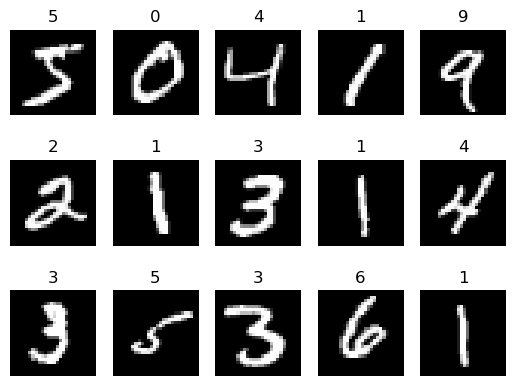

In [3]:
fig = plt.figure()
plt.tight_layout()
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("{}".format(y_train[i]))
    plt.axis('off')


## Model

NOw we build a neural network with one hidden layer and one output layer. The first [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) simply reshape the 2-dimensional image into 1-dimensional vector with all pixel values. [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) allows for stacking layers which consists of one hidden layer ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) with 128 hidden units (neurons) and ReLU activation function for nonlinear transformation and an output layer that produces 10 output values.  

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

c:\Users\brean\miniconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<code>summary()</code> function creates the table that shows the network architecture. We can see that the input layer gets 784 values and pass it to the hidden layer with 128 units (with 100,480 parameters). The hidden units compute the weighted sum and apply activation function to produce 128 outputs, which are the input to the output layer. Lastly, the output layer produces 10 logit values. 

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Let us try to use the model to make predictions. We can just call the model to produce outputs and use <code>numpy()</code> to convert the output into numpy array. 


In [6]:
predictions = model(x_train[:1]).numpy()
predictions


array([[ 0.37307447, -0.28485033, -0.4549728 , -0.1527886 ,  0.39518458,
        -0.08622026,  0.04775475,  0.04168855, -0.1668222 ,  0.17036362]],
      dtype=float32)

Hmm. It produces some outputs. Well.. Do you know what they represent? Share your thought with classmates before you move on. 

**for one image this is the logits, there is one for each classs**

Now, why do we apply <code>softmax()</code> here? Any idea? 

**We need to get the probability that the the one image belongs to each class**

In [7]:
tf.nn.softmax(predictions).numpy()


array([[0.14205547, 0.07357408, 0.06206426, 0.08396117, 0.1452313 ,
        0.08974056, 0.10260614, 0.1019856 , 0.08279112, 0.11599031]],
      dtype=float32)

Is this output correct? Let us see the image to see if the output is correct.

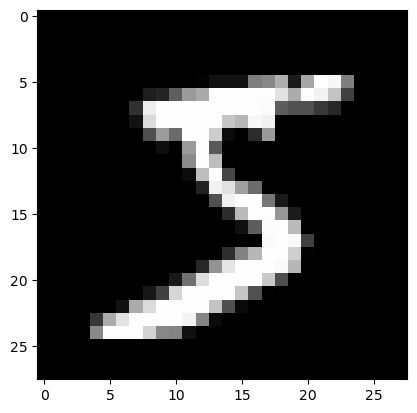

In [8]:
plt.imshow(x_train[0], cmap='gray', interpolation='none')



<font color="red">**PAUSE:  When you reach here, start to think about what we need to do to make correct prediction.**</font>

We have the following codes without any comments. Let us discuss the following codes to figure out what is happening here. 

## Objective (Loss) Function

**Define the loss function then compute the loss**

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [10]:
loss_fn(y_train[:1], predictions).numpy()

2.4108326

## Optimization

In [11]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Training

**Training where we do forward and back propogation including gradient descent.**

**Number of epochs means you do the training workflow more. Typically, the more epochs the better the model converges to the loss minimum.**

In [12]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9237 - loss: 0.2661
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9657 - loss: 0.1180
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9760 - loss: 0.0807
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9816 - loss: 0.0611
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9856 - loss: 0.0469


## Testing

**see how well the model performs**

*verbose=2 is how much output you want to print out*

In [13]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9762 - loss: 0.0829


[0.08291830122470856, 0.9761999845504761]

In [14]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [15]:
probs = probability_model(x_test[:10])
probs

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[3.99803168e-09, 7.38743511e-11, 3.07068802e-07, 7.10127460e-06,
        2.97362204e-11, 3.40405898e-10, 1.47404861e-13, 9.99992132e-01,
        3.02107672e-08, 3.44986034e-07],
       [1.38477620e-08, 1.12524503e-06, 9.99998212e-01, 4.70386965e-08,
        1.07197430e-15, 4.03258369e-08, 1.07444970e-10, 3.80238071e-14,
        6.01220279e-07, 8.93618773e-12],
       [8.82559470e-06, 9.93976712e-01, 1.07102771e-03, 1.02381957e-04,
        6.70384557e-04, 1.31466859e-05, 3.17145052e-04, 1.84280600e-03,
        1.98363443e-03, 1.40139146e-05],
       [9.99510646e-01, 4.92507457e-09, 2.45526189e-05, 5.81554405e-09,
        1.28914394e-06, 2.20266102e-07, 5.91317366e-05, 3.80131765e-04,
        2.05345230e-09, 2.40600093e-05],
       [7.20289449e-07, 4.50214976e-09, 1.18614551e-07, 1.79513371e-09,
        9.99619603e-01, 2.40618503e-09, 5.29119930e-08, 3.99500786e-05,
        8.36303968e-08, 3.39478313e-04],
       [8.55928533e-07, 9

**The number above is the probability.**

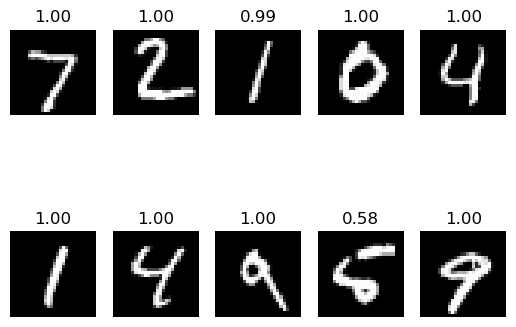

In [16]:
fig = plt.figure()
plt.tight_layout()
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i], cmap='gray', interpolation='none')
    plt.title("{:.2f}".format(max(probs[i])))
    plt.axis('off')